# 07_기계학습_ 3_텍스트마이닝

- 한글 사용자 사전 기준 빈도 : 로딩 - 클렌징 - 사정 등록 - TDM - 빈도 확인

- 한글 line, Dataframe 명사 빈도 : 로딩 - 클렌징 - (사전 등록) - 학습(w/ 사전) - 명사 추출 - 빈도 확인
- 한글 line, Dataframe 형용사 빈도 : 로딩 - 클렌징 - (사전 등록) - 학습(w/사전) - 품사 tagging - 형용사 추출 - 빈도 확인
- 한글 Dataframe 명사, 형용사 TDM 생성 : 로딩 - 클렌징 - 벡터화 인스턴스 생성 - TDM생성 - (명사, 형용사 구분) 

- 영어 사용사 사전 기준 빈도 :
- 영어 line, Dataframe 빈도 :
- 영어 명사 Dataframe TDM 생성 :
- 영어 형용사 Dataframe TDM 생성 :

**품사표**<br>
명사NN<br>
일반명사NNG<br>
고유명사NNP<br>
의존명사NNB<br>
동사VV<br>
형용사VA<br>
부사MA

In [2]:
import pandas as pd

# 한글 사용자 사전 기준 빈도

In [3]:
file = open('data/영화 기생충_review.txt', 'r', encoding='cp949')
line = file.read()

import re
line = re.sub(r'\n+','\n', line)
data = pd.DataFrame(line.split('\n'), columns=['sentence'])
data.head(3)

,sentence
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..


In [4]:
import re

data['sentence'] = data['sentence'].map(lambda x: re.sub(r"\d", " ", x))
data['sentence'] = data['sentence'].map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
data.head(3)

,sentence
0,별 개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다


In [5]:
# 공백은 사전 돌릴 때 에러나서 미리 지워줌
data = data[data['sentence'] != ' ']
data = data[data['sentence'] != '  ']
data = data[data['sentence'] != '   ']
data = data[data['sentence'] != '    ']

In [6]:
dic = pd.read_csv('data/영화 기생충_사전.txt', encoding='cp949',sep='\t', names=['word'])
dic['pos'] = 'NNP'
dic.head()

,word,pos
0,기생충,NNP
1,봉준호,NNP
2,송강호,NNP
3,기택,NNP
4,이선균,NNP


In [10]:
# 벡터화 인스턴스 생성
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# 사전으로 fit
cv.fit(dic['word'])
cv

CountVectorizer()

In [12]:
# 문서로 tdm 생성
cv_matrix = cv.transform(data['sentence'])

In [14]:
name = cv.get_feature_names()
cv_mat = cv_matrix.toarray()
tdm = pd.DataFrame(cv_mat, columns = name)

In [16]:
tdm.head(3)

,기생충,기우,기정,기택,박사장,박서준,박소담,봉준호,송강호,연교,이선균,이정은,이지혜,장혜진,조여정,최우식,충숙
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# 빈도 계산
tdm_freq = tdm.sum(axis=0).sort_values(ascending=False)
tdm_freq.head(3)

봉준호    79
송강호    31
기생충    21
dtype: int64

In [166]:
# 시각화 - 한글 깨짐 방지
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [ ]:
# 시각화
import matplotlib.pyplot as plt
tdm_freq.plot(kind = 'bar', figsize=(10,5))
plt.show()

# 한글 line, Dataframe 명사 빈도

In [182]:
file = open('data/영화 기생충_review.txt', 'r', encoding='cp949')
line = file.read()

import re
line = re.sub(r'\n+','\n', line)
data = pd.DataFrame(line.split('\n'), columns=['sentence'])
data.head(3)

,sentence
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..


In [183]:
import re
data['sentence'].fillna(' ')
data['sentence'] = data['sentence'].map(lambda x: re.sub(r"\d", " ", x))
data['sentence'] = data['sentence'].map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
data.head(3)

,sentence
0,별 개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다


In [170]:
from konlpy.tag import Komoran
komoran = Komoran()
# komoran = Komoran(userdic='data/기생충사전.txt')

In [171]:
one = ' '.join(data['sentence'])
nouns = komoran.nouns(one)

In [174]:
import collections
freq = collections.Counter(nouns)

In [175]:
freq2 = pd.DataFrame(dict(word=freq.keys(), frequency = freq.values())).sort_values('frequency', ascending=False).head(20)

In [176]:
# 2음절 이상만 추리기
freq2 = freq2.loc[freq2['word'].map(lambda x : len(x)>=2),:]

In [178]:
freq2.head(3)

,word,frequency
4,영화,514
17,봉준호,138
8,감독,125


In [ ]:
# 시각화
import matplotlib.pyplot as plt
freq2.plot(kind = 'bar', x='word',y='frequency', figsize=(10,5))
plt.show()

# 한글 line, Dataframe 형용사 빈도

In [189]:
file = open('data/영화 기생충_review.txt', 'r', encoding='cp949')
line = file.read()

import re
line = re.sub(r'\n+','\n', line)
data = pd.DataFrame(line.split('\n'), columns=['sentence'])
data.head(3)

,sentence
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..


In [190]:
import re
data['sentence'].fillna(' ')
data['sentence'] = data['sentence'].map(lambda x: re.sub(r"\d", " ", x))
data['sentence'] = data['sentence'].map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
data.head(3)

,sentence
0,별 개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다


In [191]:
from konlpy.tag import Komoran
komoran = Komoran()
# komoran = Komoran(userdic='data/new_사전.txt')

In [193]:
one = ' '.join(data['sentence'])
pos = komoran.pos(one)
pos[:3]

[('별', 'MM'), ('개', 'NNB'), ('주', 'VX')]

In [195]:
adj = []
for i in pos:
    if i[1] == 'VA':
        adj.append(i[0])
adj[:5]

['좋', '같', '없', '재밌', '같']

In [196]:
import collections
freq = collections.Counter(adj)

In [198]:
freq2 = pd.DataFrame(dict(word=freq.keys(), frequency = freq.values())).sort_values('frequency', ascending=False).head(20)

In [199]:
# 2음절 이상만 추리기
freq2 = freq2.loc[freq2['word'].map(lambda x : len(x)>=2),:]

In [200]:
freq2.head(3)

,word,frequency
3,재밌,46
11,슬프,32
19,그렇,31


In [ ]:
# 시각화
import matplotlib.pyplot as plt
freq2.plot(kind = 'bar', x='word',y='frequency', figsize=(10,5))
plt.show()

# 한글 Dataframe 명사, 형용사 TDM 생성 // 빈도 분석을 위해서는 잘 안 쓸 듯

In [2]:
file = open('data/영화 기생충_review.txt', 'r', encoding='cp949')
line = file.read()

import re
line = re.sub(r'\n+','\n', line)
data = pd.DataFrame(line.split('\n'), columns=['sentence'])
data.head(3)

,sentence
0,별1개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..


In [3]:
import re

data['sentence'] = data['sentence'].map(lambda x: re.sub(r"\d", " ", x))
data['sentence'] = data['sentence'].map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
data.head(3)

,sentence
0,별 개 준 사람들은 나베당임
1,역쉬
2,영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다


In [10]:
from konlpy.tag import Okt

twitter = Okt()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [12]:
# 벡터화 인스턴스 생성
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=tw_tokenizer)

# 사전으로 fit
cv.fit(data['sentence'])
cv

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function tw_tokenizer at 0x000002B83C71B048>)

In [13]:
# 문서로 tdm 생성
cv_matrix = cv.transform(data['sentence'])

In [14]:
name = cv.get_feature_names()
cv_mat = cv_matrix.toarray()
tdm = pd.DataFrame(cv_mat, columns = name)

In [15]:
tdm.head(3)

,a,age,an,avant,b,black,bomb,comedy,d,do,...,힐,힘,힘내세요,힘든,힘들게,힘들다,힘들었다,힘들지,힘들지만,힘듬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# 빈도 계산(2글자 이상)
tdm_freq = tdm.sum(axis=0).sort_values(ascending=False)

len2 = []
for i in tdm_freq.index:
    if len(i) >=2:
        len2.append(True)
    else:
        len2.append(False)

tdm_freq = tdm_freq[len2]
tdm_freq.head(3)

영화     499
봉준호    138
감독     126
dtype: int64

In [89]:
# 명사, 형용사 골라내야할 때
pos_noun = []
pos_adj = []
for i in tdm.columns:
    p = twitter.pos(i)[0]
    if p[1] == 'Noun':
        pos_noun.append(i)
    elif p[1] == 'Adjective':
        pos_adj.append(i)

In [95]:
tdm_noun = tdm.loc[:,pos_noun]
tdm_adj = tdm.loc[:, pos_adj]
tdm_adj.head(3)

,가난한,가난한자,가난한자는,가능한,가능할,가능함,가득한,가벼,가벼우면서도,가벼운,...,흥미롭게,흥미롭다,희한하게,힘든,힘들게,힘들다,힘들었다,힘들지,힘들지만,힘듬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
pos_noun_bool = []
for i in tdm_freq.index:
    if i in pos_noun:
        pos_noun_bool.append(True)
    else:
        pos_noun_bool.append(False)

pos_adj_bool = []
for i in tdm_freq.index:
    if i in pos_adj:
        pos_adj_bool.append(True)
    else:
        pos_adj_bool.append(False)

In [91]:
tdm_freq[pos_noun_bool].head(3)

영화     499
봉준호    138
감독     126
dtype: int64

In [92]:
tdm_freq[pos_adj_bool].head(3)

없는     48
있는     39
입니다    30
dtype: int64

# 영어 line, Dataframe 빈도

In [62]:
import pandas as pd
data = pd.read_csv('data/SteveJobs.txt', sep='\n', names = ['sentence'])
data.head(3)

,sentence
0,I am honored to be with you today at your comm...
1,The first story is about connecting the dots.
2,I dropped out of Reed College after the first ...


In [63]:
line = ' '.join(data['sentence'].tolist())
line[300:400]

'e stories. The first story is about connecting the dots. I dropped out of Reed College after the fir'

In [64]:
import re
line = re.sub(r'[-,.?!;:\'\"]',' ', line).lower()
line[300:400]

'e stories  the first story is about connecting the dots  i dropped out of reed college after the fir'

In [65]:
from nltk import word_tokenize
words = word_tokenize(line)
print(type(words), len(words))
print(words[:10])

<class 'list'> 2355
['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your']


## (옵션)불용어 처리 할 경우

In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\50008313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for word in words:
    #소문자로 모두 변환합니다. 
    word = word.lower()
    # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
        all_tokens.append(word)
    
print(all_tokens[:5])

['honored', 'today', 'commencement', 'one', 'finest']


## 품사 기준으로 선택할 경우

In [68]:
import nltk
tags = nltk.pos_tag(all_tokens)
tags[:5]

[('honored', 'VBN'),
 ('today', 'NN'),
 ('commencement', 'NN'),
 ('one', 'CD'),
 ('finest', 'NN')]

In [69]:
# nltk.help.upenn_tagset()
# 형용사 : 'JJ','JJR','JJS'
# 명사 : 'NN','NNP','NNPS','NNS','PRP','PRP$'

In [70]:
# 형용사의 경우
adj = []
for i in tags:
    if i[1] in ['JJ','JJR','JJS']:
        adj.append(i[0])
adj[:5]

['closest', 'big', 'born', 'biological', 'young']

In [71]:
# 얘는 명사
noun = []
for i in tags:
    if i[1] in ['NN','NNP','NNPS','NNS','PRP','PRP$']:
        noun.append(i[0])
noun[:5]

['today', 'commencement', 'finest', 'world', 'college']

## 토큰별 빈도 계산

In [78]:
import collections
freq = collections.Counter(adj)

In [79]:
freq2 = pd.DataFrame(dict(word=freq.keys(), frequency = freq.values())).sort_values('frequency', ascending=False)

In [80]:
# 2음절 이상만 추리기
freq2 = freq2.loc[freq2['word'].map(lambda x : len(x)>=2),:]

In [81]:
freq2.head(3)

,word,frequency
14,the,98
3,to,71
82,and,67


In [82]:
freq2['frequency'].sum()

2114

# 영어 Dataframe 명사 TDM 생성

In [89]:
import pandas as pd
data = pd.read_csv('data/SteveJobs.txt', sep='\n', names = ['sentence'])
data.head(3)

,sentence
0,I am honored to be with you today at your comm...
1,The first story is about connecting the dots.
2,I dropped out of Reed College after the first ...


In [90]:
import re
data.fillna(' ')
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'\d+',' ', x)) # 숫자 제거
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'[-,.?!;:\'\"]',' ', x)) # 약식으로 이것만 해도 될 듯
# data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'[-+=,#/\?:^$.@*\"~&%!\\|;\(\)\[\]\<\>\'.]',' ', x))
data['sentence'] = data['sentence'].apply(lambda x : x.lower())

## (옵션)불용어 처리할 경우

In [66]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\50008313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
# 벡터화 인스턴스 생성
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# cv = CountVectorizer(stop_words=stopwords) # 불용어 처리 시

# 사전으로 fit
cv.fit(data['sentence'])
cv

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [98]:
# 문서로 tdm 생성
cv_matrix = cv.transform(data['sentence'])

In [99]:
name = cv.get_feature_names()
cv_mat = cv_matrix.toarray()
tdm = pd.DataFrame(cv_mat, columns = name)

In [100]:
tdm.head(3)

,across,adopted,adoption,adult,adventurous,advised,affairs,age,agent,ago,...,work,worked,working,world,would,woz,year,years,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# (참고) 데이터 로딩

## *불러올 때부터 쪼개서 가져오기 = \n 기준으로 행이 구분된 데이터 프레임(결과 2)

In [125]:
import pandas as pd
data = pd.read_csv('data/SteveJobs.txt', sep='\n', names = ['sentence'])
data.head(3)

,sentence
0,I am honored to be with you today at your comm...
1,The first story is about connecting the dots.
2,I dropped out of Reed College after the first ...


### 모든 행을 합치기 = 전체 내용이 들어간 하나의 텍스트(결과 1) *

In [123]:
line = ' '.join(data['sentence'].tolist())
line[300:400]

'e stories. The first story is about connecting the dots. I dropped out of Reed College after the fir'

## 그냥 불러오기 = \n이 포함되어 있음  // 정신건강에 안 좋은 방법

In [71]:
file = open('data/SteveJobs.txt', 'r', encoding='utf-8')
line = file.read()

In [72]:
line[300:400]

'e stories.\n\nThe first story is about connecting the dots.\n\nI dropped out of Reed College after the f'

### \n 제거 = 전체 내용이 들어간 하나의 텍스트(결과 1)

In [67]:
import re
line = re.sub(r'\n+',' ', line)
line[300:400]

'e stories. The first story is about connecting the dots. I dropped out of Reed College after the fir'

### \n 기준으로 행 쪼개기 = 데이터 프레임(결과 2)

In [83]:
import re
line = re.sub(r'\n+','\n', line)
data = pd.DataFrame(line.split('\n'), columns=['sentence'])
data.head(3)

,sentence
0,I am honored to be with you today at your comm...
1,The first story is about connecting the dots.
2,I dropped out of Reed College after the first ...


# (참고) 숫자, 특수문자 등 제거 및 소문자화

## 텍스트일 때

In [102]:
import re
line = re.sub(r'[-,.?!;:\'\"]',' ', line).lower()
line[300:400]
# re.sub(r'[-+=,#/\?:^$.@*\"~&%!\\|;\(\)\[\]\<\>\'.]',' ', line)

'e stories the first story is about connecting the dots i dropped out of reed college after the first'

## 데이터 프레임일 때

In [97]:
import re
data.fillna(' ')
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'\d+',' ', x)) # 숫자 제거
data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'[-,.?!;:\'\"]',' ', x)) # 약식으로 이것만 해도 될 듯
# data['sentence'] = data['sentence'].apply(lambda x : re.sub(r'[-+=,#/\?:^$.@*\"~&%!\\|;\(\)\[\]\<\>\'.]',' ', x))
data['sentence'] = data['sentence'].apply(lambda x : x.lower())

# (참고) 영어/한글 텍스트 마이닝 다른 자료
- 한글 버전은 '파이썬으로 영어와 한국어 텍스트 다루기 — Courses' 참고

In [3]:
#!pip install nltk

In [5]:
import nltk

In [ ]:
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

In [7]:
#!pip install -U gensim

In [8]:
#!pip install twython

### 데이터 로딩

In [14]:
# Read Document
file = open('data/SteveJobs.txt', 'r', encoding='utf-8')
doc_en = file.read()

### Tokenize

In [29]:
# Tokenizing
from nltk import regexp_tokenize
# pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
pattern = "[\w']+"
tokens_en = regexp_tokenize(doc_en, pattern)

### nltk.Text() 사용 예시

In [31]:
import nltk
en = nltk.Text(tokens_en)

In [32]:
en

<Text: I am honored to be with you today...>

In [33]:
print(len(en.tokens))       # returns number of tokens (document length)
print(len(set(en.tokens)))  # returns number of unique tokens
en.vocab()                  # returns frequency distribution

2290
744


FreqDist({'I': 93, 'the': 91, 'to': 71, 'and': 49, 'was': 48, 'a': 46, 'of': 40, 'that': 38, 'it': 37, 'in': 34, ...})

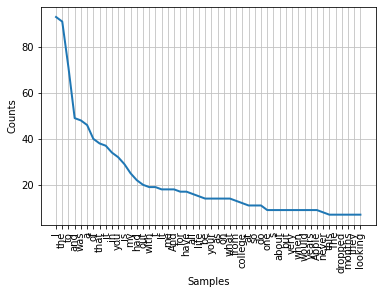

In [35]:
en.plot(50) 

In [38]:
en.count('to') 

71

In [39]:
en.concordance('looking', lines=5)

Displaying 5 of 7 matches:
It was pretty scary at the time but looking back it was one of the best decisio
 was impossible to connect the dots looking forward when I was in college But i
 college But it was very very clear looking backward 10 years later Again you c
er Again you can t connect the dots looking forward you can only connect them l
g forward you can only connect them looking backward So you have to trust that 


In [41]:
en.similar('to')

you is about sometimes


In [ ]:
en.collocations()

### pos_tagging

In [45]:
tags_en = nltk.pos_tag(tokens_en)
tags_en[:5]

[('I', 'PRP'), ('am', 'VBP'), ('honored', 'VBN'), ('to', 'TO'), ('be', 'VB')]

### word cloud

In [47]:
print(en.vocab())

<FreqDist with 744 samples and 2290 outcomes>


In [49]:
type(en.vocab())

nltk.probability.FreqDist

In [ ]:
data = en.vocab().items()
print(data)
print(type(data))

In [ ]:
import csv
with open('words.csv', 'w', encoding='utf-8') as f:
    f.write('word,freq\n')
    writer = csv.writer(f)
    writer.writerows(data)

In [ ]:
# 아래의 코드를 복사하여 words.csv가 있는 폴더 내에 index.html라는 이름으로 저장하자.
<!DOCTYPE html>
<html>
<head>
  <style>
    text:hover {
        stroke: black;
    }
  </style>
  <script src="http://d3js.org/d3.v3.min.js" charset="utf-8"></script>
  <script src="d3.layout.cloud.js"></script>
</head>
<body>
  <div id="cloud"></div>
  <script type="text/javascript">
    var weight = 3,   // change me
        width = 960,
        height = 500;

    var fill = d3.scale.category20();
    d3.csv("words.csv", function(d) {
        return {
          text: d.word,
          size: +d.freq*weight
        }
      },
      function(data) {
        d3.layout.cloud().size([width, height]).words(data)
          //.rotate(function() { return ~~(Math.random() * 2) * 90; })
          .rotate(0)
          .font("Impact")
          .fontSize(function(d) { return d.size; })
          .on("end", draw)
          .start();

        function draw(words) {
          d3.select("#cloud").append("svg")
              .attr("width", width)
              .attr("height", height)
            .append("g")
              .attr("transform", "translate(" + width/2 + "," + height/2 + ")")
            .selectAll("text")
              .data(words)
            .enter().append("text")
              .style("font-size", function(d) { return d.size + "px"; })
              .style("font-family", "Impact")
              .style("fill", function(d, i) { return fill(i); })
              .attr("text-anchor", "middle")
              .attr("transform", function(d) {
                return "translate(" + [d.x, d.y] + ")rotate(" + d.rotate + ")";
              })
            .text(function(d) { return d.text; });
        }
      });
  </script>
</body>
</html>

- 위와 같은 폴더에서 아래를 실행하자.
- python -m http.server 8888      # for Python2, `python -m SimpleHTTPServer`

- 마지막으로, 모던 브라우저(ex: 크롬)의 주소창에 http://localhost:8888를 입력하면 우리의 워드클라우드가 떠있을 것이다! (이미지를 클릭하면 interative 페이지로 이동합니다.)